# import the python labs

In [2]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


# connect to the db and create a cursor 

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [4]:
cur=conn.cursor()

# q1-4
1. define yoru sql
2. pass the sql to pandas, load the data into dataframe
3. use dataframe to display the table or show the chart

## q1

In [31]:
q1_sql = """
        select * from demo.student
        """

In [32]:
df=pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,m1
1,s2@jmu.edu,s2,m2
2,s3@jmu.edu,s3,m1
3,s4@jmu.edu,s4,m2
4,s5@jmu.edu,s5,ia
5,s6@jmu.edu,s6,ia
6,s23@jmu.edu,s5,ia


## q2
join the professor tabel with the course table

In [8]:
q2_sql = """
        select demo.professor.p_name,
        demo.course.c_name
        from demo.professor
        inner join demo.course
        on demo.professor.p_email = demo.course.p_email
        """

In [9]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,t2,cn3
1,t3,cn4
2,p_new_n,c_new_name
3,p_new_n,cn1
4,p_new_n,cn2


## q3
Count the number of records per course, then use pandas to create a bar chart

In [14]:
q3_sql = """
        select c_number,
        count(c_number) as num_enroll
        from demo.enroll_list
        group by c_number
        """

In [15]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enroll
0,c4,2
1,c2,3
2,c3,1
3,c1,4


<AxesSubplot:xlabel='c_number'>

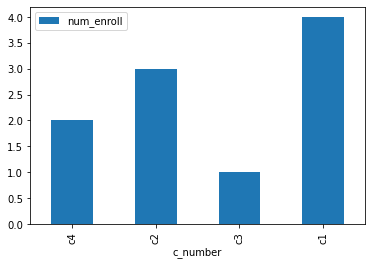

In [16]:
df.plot.bar(x='c_number',y='num_enroll')

## q4
1. joint the professor with the course table
2. count the number of course per professor
3. create a bar chart

In [17]:
q4_sql = """
        select demo.professor.p_name,
        count(demo.course.c_name) as num_course
        from demo.professor
        inner join demo.course
        on demo.professor.p_email = demo.course.p_email
        group by demo.professor.p_name
        """

In [18]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,p_new_n,3
1,t2,1
2,t3,1


<AxesSubplot:xlabel='p_name'>

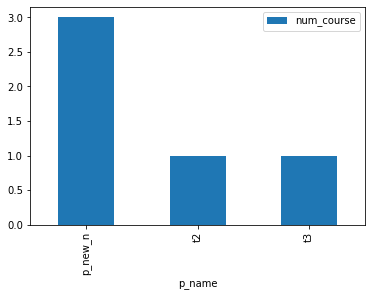

In [19]:
df.plot.bar(x='p_name',y='num_course')

# q5-6
1. define your sql
2. use coursor to execute your sql
3. if no error, commit your chagne
4. if has error, roll back, and go back to 1. 
5. use pandas to dispaly the modified table

## q5

change the professor table

In [56]:
q5_insert_professor_sql = """
            insert into demo.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into demo.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [37]:
cur.execute(q5_insert_professor_sql)

In [62]:
# conn.rollback() #if error, rollback

In [39]:
conn.commit() # no error. commit

In [40]:
df=pandas.read_sql_query('select * from demo.professor',conn)
df[:]

,p_email,p_name,p_office
0,t2@jmu.edu,t2,o2
1,t3@jmu.edu,t3,o3
2,t4@jmu.edu,t4,04
3,p_new_e,p_new_n,p_new_o
4,new_lab4_email,new_p_lab4_name,new_lab4_o


change the course table

In [57]:
q5_insert_course_sql = """
            insert into demo.course(c_number,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into demo.course(c_number,c_name,c_room,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [53]:
cur.execute(q5_insert_course_sql)

In [54]:
conn.commit() # no error. commit

In [55]:
df=pandas.read_sql_query('select * from demo.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,c3,cn3,r3,t2@jmu.edu
1,c4,cn4,r4,t3@jmu.edu
2,c_new_n,c_new_name,c_new_r,p_new_e
3,c1,cn1,r1,p_new_e
4,c2,cn2,r2,p_new_e
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


## q6

udpate the course table

In [61]:
q6_update_course_sql ="""
                    update demo.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [63]:
cur.execute(q6_update_course_sql)

In [64]:
conn.commit() # no error. commit

In [65]:
df=pandas.read_sql_query('select * from demo.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,c4,cn4,r4,t3@jmu.edu
1,c_new_n,c_new_name,c_new_r,p_new_e
2,c1,cn1,r1,p_new_e
3,c2,cn2,r2,p_new_e
4,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email
5,c3,cn3,r3,new_lab4_email


delete the professor

In [66]:
q6_delete_professor_sql = """
                            delete from demo.professor
                            where p_email='{}'
                            """.format('t2@jmu.edu')

In [67]:
cur.execute(q6_delete_professor_sql)

In [68]:
conn.commit() # no error. commit

In [69]:
df=pandas.read_sql_query('select * from demo.professor',conn)
df[:]

,p_email,p_name,p_office
0,t3@jmu.edu,t3,o3
1,t4@jmu.edu,t4,04
2,p_new_e,p_new_n,p_new_o
3,new_lab4_email,new_p_lab4_name,new_lab4_o


# close the cursor and connnection 

In [5]:
cur.close()

In [6]:
conn.close()